# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


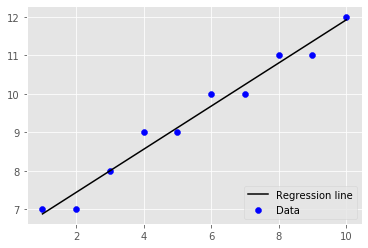

Basic Regression Diagnostics
----------------------------
Slope:  0.56
Y-intercept:  6.32
R-Squared:  0.9715909090909091
----------------------------
Model: Y = 6.32 + 0.56x


In [41]:
def calc_slope(xs, ys):   #slope
    m = ((np.mean(xs) * np.mean(ys)) - np.mean(xs*ys)) / ((np.mean(xs)**2) - np.mean(xs*xs))
    return np.round(m,2)
#calc_slope(X, Y)

def best_fit(xs, ys):  #Y intercept
    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*(np.mean(xs))
    return np.round(c, 2)
#best_fit(X,Y)

m = calc_slope(X,Y)
c = np.mean(Y) - m*(np.mean(X))

def reg_line(m, c, X):   #regression line
    return [(m*x) + c for x in X]
regression_line = reg_line(m,c, X)

def sum_sq_err(ys_predicted, ys_real):  # sum of squared error
    sse = sum((ys_predicted - ys_real) * (ys_predicted - ys_real))
    return np.round(sse,2)

def r_squared(ys_real, ys_predicted):  #R-squared
    y_mean = [np.mean(ys_real) for y in ys_real]
    
    sq_err_reg = sum_sq_err(ys_real, ys_predicted)
    sq_err_y_mean = sum_sq_err(ys_real, y_mean)
    
    r_sq = 1 - (sq_err_reg/sq_err_y_mean)
    return r_sq


def plot_reg(X, Y, Y_pred):
    plt.scatter(X,Y, color = 'blue', label = 'Data')
    plt.plot(X,Y_pred, color = 'black', label = 'Regression line')
    plt.legend(loc=4)
    plt.show()
    return None

# m, c = best_fit(X, Y)
Y_pred = reg_line(m,c,X)
r_squared = r_squared(Y, Y_pred)

plot_reg(X, Y, Y_pred)

print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope: ', m)
print('Y-intercept: ', c)
print('R-Squared: ', r_squared)
print('----------------------------')
print('Model: Y = 6.32 + 0.56x')

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


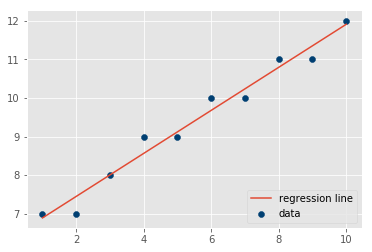

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [43]:
# Make prediction for x = 4.5 and visualize on the scatter plot

x_new = 4.5
y_new = c + (m*x_new)
y_new

8.84

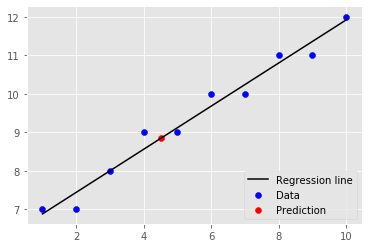

In [45]:
plt.scatter(X,Y, color='blue', label='Data')
plt.plot(X,Y_pred, color = 'black', label='Regression line')
plt.scatter(x_new, y_new, color='red', label = 'Prediction')
plt.legend(loc=4)
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 